In [107]:
# import python packages needed
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import sklearn as sk
from local import config as local_conf

# References

## [Spotify Developer Account](https://developer.spotify.com/dashboard/login)

## [Authorization Guide (Client Credentials Flow)](https://developer.spotify.com/documentation/general/guides/authorization-guide/#client-credentials-flow)

## [Web API Reference](https://developer.spotify.com/documentation/web-api/reference/)

## [Spotipy Documentation](https://spotipy.readthedocs.io/en/2.16.1/#spotipy.client.Spotify.playlist_tracks)

## [Spotipy GitHub Examples](https://github.com/plamere/spotipy/tree/master/examples)

## [Spotify Features Analysis](https://rpubs.com/PeterDola/SpotifyTracks)


In [108]:
# create our connection to the API
# client_id = '' # put your own client id
# client_secret = '' # put your own client secret
username = "megraswan" # username

In [109]:
# connect
client_credentials_manager = SpotifyClientCredentials(local_conf.CLIENT_ID, local_conf.CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [111]:
# playlist ID you would like to get track data from 
pl_id = 'spotify:playlist:1kthr7VG9a1oGC4bQixTas'

# playlist_items() gets each item from the playlist
response = sp.playlist_items(pl_id,
                                limit=1, # maximum number of tracks to return
                                offset=0, # the index of the first track to return
                                fields='total', # which fields to return
                                additional_types=['track']) # list of item types to return (we want tracks)
total_num_tracks = response['total'] # total_num_tracks stores total number of tracks in playlist

offset = 0 # will act as a pointer after every 100 tracks we go through
limit = 100
# print(total_num_tracks, int(total_num_tracks/limit))

dfs = [] # data frames list
for n in range(int(total_num_tracks/limit)+1): # we want to iterate 10 times bc we have 909 tracks in this cases (we will get data for every 100 tracks each loop)
    response = sp.playlist_items(pl_id,
                                limit=limit,
                                offset=offset, 
                                fields='items.track.id,items.track.name,items.track.artist,items.track.track_number,items.track.duration_ms,items.track.id,total',
                                additional_types=['track']) 

    # pprint(response)
    track_ids = []
    tracks = []    
    for item in response['items']: # item is a dictionary that has dictionaries
        track_ids.append(item['track']['id']) # in the dictionary "item", we are getting the value for key "id" from dictionary "track"
        # {"items": {"track": {"id": '17CPezzLWzvGfpZW6X8XT0'}}}
        # storing dictionary in track_info
        track_info = {  "name":item['track']['name'],
                        "duration_ms":item['track']['duration_ms'],
                        "track_number":item['track']['track_number']    }
        # {"items": {"track": {"name": 'Say You, Say Me'}}}
        # {"items": {"track": {"duration_ms": 241066}}}
        # {"items": {"track": {"track_number": 8}}}
        tracks.append(track_info)

    # get audio features from each track id from track_ids list
    features = sp.audio_features(tracks=track_ids)

    # print(len(tracks))

    # for every rack, add/combine features list items to tracks list (both have dictionaries so we combine dictionaries)
    for idx in range(len(tracks)):
        tracks[idx].update(features[idx]) 

    df = pd.DataFrame(tracks) # create data frame df of tracks list
    dfs.append(df) # add data frame to dfs list
    # pprint(features)

    if len(response['items']) == 0: # if no items, exit loop
        break

    offset = offset + len(response['items']) # increment offset by length of items in loop (move pointer every 100 items until it reaches end of tracks)
    print(offset, "/", response['total']) # display how many tracks we went through after each loop out of total number of tracks

# Put all songs in 1 DataFrame
df_combo = pd.concat(dfs) # combine the data frames in the dfs list to 1 data frame
df_combo.head() # print first few rows of data frame

100 / 909
200 / 909
300 / 909
400 / 909
500 / 909
600 / 909
700 / 909
800 / 909
900 / 909
909 / 909


,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.5430,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.1680,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.0180,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.0768,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.0197,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4


In [112]:
df_combo

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Every Breath You Take,253920,7,0.820,0.452,1,-9.796,1,0.0348,0.543000,0.002940,0.0714,0.740,117.401,audio_features,1JSTJqkT5qHq8MDJnJbRE1,spotify:track:1JSTJqkT5qHq8MDJnJbRE1,https://api.spotify.com/v1/tracks/1JSTJqkT5qHq...,https://api.spotify.com/v1/audio-analysis/1JST...,4
1,Don't You (Forget About Me),263040,1,0.660,0.816,2,-6.610,1,0.0299,0.168000,0.018100,0.0608,0.678,111.346,audio_features,3fH4KjXFYMmljxrcGrbPj9,spotify:track:3fH4KjXFYMmljxrcGrbPj9,https://api.spotify.com/v1/tracks/3fH4KjXFYMml...,https://api.spotify.com/v1/audio-analysis/3fH4...,4
2,Take on Me,225280,1,0.573,0.902,6,-7.638,0,0.0540,0.018000,0.001250,0.0928,0.876,84.412,audio_features,2WfaOiMkCvy7F5fcp2zZ8L,spotify:track:2WfaOiMkCvy7F5fcp2zZ8L,https://api.spotify.com/v1/tracks/2WfaOiMkCvy7...,https://api.spotify.com/v1/audio-analysis/2Wfa...,4
3,Livin' On A Prayer,249293,3,0.534,0.887,0,-3.777,1,0.0345,0.076800,0.000099,0.3250,0.720,122.494,audio_features,0J6mQxEZnlRt9ymzFntA6z,spotify:track:0J6mQxEZnlRt9ymzFntA6z,https://api.spotify.com/v1/tracks/0J6mQxEZnlRt...,https://api.spotify.com/v1/audio-analysis/0J6m...,4
4,If You Leave Me Now,235373,4,0.434,0.563,11,-6.784,1,0.0268,0.019700,0.000824,0.1280,0.275,104.183,audio_features,0KMGxYKeUzK9wc5DZCt3HT,spotify:track:0KMGxYKeUzK9wc5DZCt3HT,https://api.spotify.com/v1/tracks/0KMGxYKeUzK9...,https://api.spotify.com/v1/audio-analysis/0KMG...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Orange Crush - Remastered,231640,7,0.568,0.701,9,-10.453,1,0.0400,0.000613,0.002580,0.1700,0.638,120.678,audio_features,7sNhXWrg9eW3qRqeuePaIC,spotify:track:7sNhXWrg9eW3qRqeuePaIC,https://api.spotify.com/v1/tracks/7sNhXWrg9eW3...,https://api.spotify.com/v1/audio-analysis/7sNh...,4
5,Free,356560,11,0.507,0.365,6,-10.733,1,0.0378,0.742000,0.008070,0.1010,0.469,91.182,audio_features,5aPVQqYEEZKREbFRxLiAp5,spotify:track:5aPVQqYEEZKREbFRxLiAp5,https://api.spotify.com/v1/tracks/5aPVQqYEEZKR...,https://api.spotify.com/v1/audio-analysis/5aPV...,4
6,Miss Sarajevo,310907,6,0.719,0.582,4,-11.091,1,0.0254,0.509000,0.721000,0.1080,0.383,105.078,audio_features,6x5pI6n5feaWcP8jCdTk3E,spotify:track:6x5pI6n5feaWcP8jCdTk3E,https://api.spotify.com/v1/tracks/6x5pI6n5feaW...,https://api.spotify.com/v1/audio-analysis/6x5p...,4
7,Roam,295133,6,0.636,0.939,9,-5.551,1,0.0837,0.048500,0.000007,0.2710,0.694,134.937,audio_features,5fqcIHU6DhQtFKVO5XSdQs,spotify:track:5fqcIHU6DhQtFKVO5XSdQs,https://api.spotify.com/v1/tracks/5fqcIHU6DhQt...,https://api.spotify.com/v1/audio-analysis/5fqc...,4


In [113]:
# check for missing values
# nothing is missing wooooooo
df_combo.isnull().mean()

name                0.0
duration_ms         0.0
track_number        0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
type                0.0
id                  0.0
uri                 0.0
track_href          0.0
analysis_url        0.0
time_signature      0.0
dtype: float64

In [114]:
# correlation
df_combo.corr()

,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
duration_ms,1.000000,-0.012092,-0.118644,-0.080954,3.051677e-02,-0.083806,-0.033619,-0.050690,0.033313,0.090517,4.895443e-02,-0.214681,-0.013103,-0.022214
track_number,-0.012092,1.000000,-0.018786,-0.092053,2.064617e-02,-0.031333,-0.024345,-0.044792,0.018478,0.093735,-1.849399e-02,-0.086396,-0.080638,-0.039721
danceability,-0.118644,-0.018786,1.000000,0.083249,1.195449e-02,0.009704,-0.083515,0.070489,-0.100009,0.049384,-1.391000e-01,0.536030,-0.203107,0.129842
energy,-0.080954,-0.092053,0.083249,1.000000,-4.596392e-02,0.728702,-0.058384,0.225117,-0.606099,0.041891,1.558742e-01,0.529882,0.186162,0.153113
key,0.030517,0.020646,0.011954,-0.045964,1.000000e+00,-0.031217,-0.098234,0.008843,0.024213,-0.031440,7.217794e-07,-0.025386,-0.046735,-0.028569
loudness,-0.083806,-0.031333,0.009704,0.728702,-3.121680e-02,1.000000,-0.023318,0.104514,-0.382855,-0.028430,1.235046e-01,0.220904,0.082152,0.054296
mode,-0.033619,-0.024345,-0.083515,-0.058384,-9.823399e-02,-0.023318,1.000000,-0.048850,0.110822,0.005297,3.237481e-02,-0.108993,-0.009345,-0.009784
speechiness,-0.050690,-0.044792,0.070489,0.225117,8.842651e-03,0.104514,-0.048850,1.000000,-0.146903,-0.005004,5.050699e-02,0.166753,0.112566,0.061343
acousticness,0.033313,0.018478,-0.100009,-0.606099,2.421299e-02,-0.382855,0.110822,-0.146903,1.000000,-0.019054,-4.756495e-02,-0.375523,-0.112837,-0.161531
instrumentalness,0.090517,0.093735,0.049384,0.041891,-3.144026e-02,-0.028430,0.005297,-0.005004,-0.019054,1.000000,-2.605412e-02,0.048132,-0.013474,0.016741


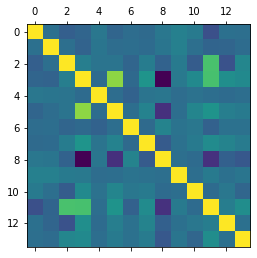

In [115]:
# plot correlation
plt.matshow(df_combo.corr())
plt.show()

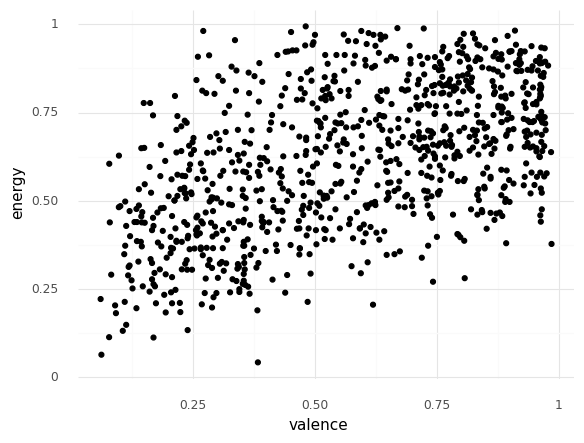

<ggplot: (8782609471501)>

In [116]:
(ggplot(df_combo, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal())

In [117]:
# valence and energy values
valence_energy = ["name", "valence", "energy"]

In [133]:
large_valence_df = df_combo.nlargest(50, "valence") #highest valence in our entire dataset
# large_valence_df
large_valence_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
58,What a Fool Believes,223867,2,0.758,0.378,8,-15.308,0,0.0449,0.28400,0.000000,0.0490,0.985,120.736,audio_features,2yBVeksU2EtrPJbTu4ZslK,spotify:track:2yBVeksU2EtrPJbTu4ZslK,https://api.spotify.com/v1/tracks/2yBVeksU2Etr...,https://api.spotify.com/v1/audio-analysis/2yBV...,4
13,She Works Hard For The Money,320840,1,0.758,0.638,8,-13.010,0,0.0378,0.00486,0.014100,0.0938,0.984,136.502,audio_features,3FlOciKDqFlTMPeC7t92Qy,spotify:track:3FlOciKDqFlTMPeC7t92Qy,https://api.spotify.com/v1/tracks/3FlOciKDqFlT...,https://api.spotify.com/v1/audio-analysis/3FlO...,4
36,Material Girl,240280,20,0.742,0.883,0,-3.419,1,0.0329,0.33300,0.000008,0.0964,0.978,136.506,audio_features,5pJCPFqScbHTESXDFesPb1,spotify:track:5pJCPFqScbHTESXDFesPb1,https://api.spotify.com/v1/tracks/5pJCPFqScbHT...,https://api.spotify.com/v1/audio-analysis/5pJC...,4
75,Addicted To Love,363640,3,0.702,0.578,2,-13.415,1,0.0310,0.38200,0.000006,0.0425,0.975,111.617,audio_features,5izGeTxueiFX1UPFGohY9w,spotify:track:5izGeTxueiFX1UPFGohY9w,https://api.spotify.com/v1/tracks/5izGeTxueiFX...,https://api.spotify.com/v1/audio-analysis/5izG...,4
16,Bad Girls,295107,2,0.857,0.700,2,-14.506,0,0.0358,0.00387,0.016400,0.4110,0.973,120.529,audio_features,1ibRqifchaAfeNdQGpbRVW,spotify:track:1ibRqifchaAfeNdQGpbRVW,https://api.spotify.com/v1/tracks/1ibRqifchaAf...,https://api.spotify.com/v1/audio-analysis/1ibR...,4


In [119]:
# only want valence and energy info
large_valence = large_valence_df[valence_energy]
large_valence

,name,valence,energy
58,What a Fool Believes,0.985,0.378
13,She Works Hard For The Money,0.984,0.638
36,Material Girl,0.978,0.883
75,Addicted To Love,0.975,0.578
16,Bad Girls,0.973,0.700
90,Hungry Heart,0.972,0.894
19,Rasputin - Single Version,0.972,0.719
39,Start Me Up - Remastered 2009,0.971,0.932
62,Hurts So Good,0.971,0.737
39,Like a Virgin,0.970,0.655


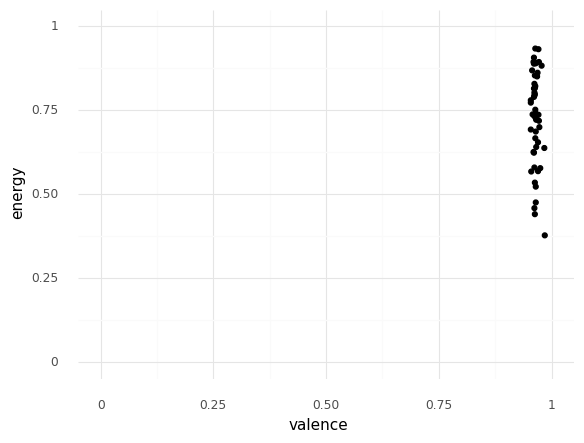

<ggplot: (8782609473353)>

In [120]:
(ggplot(large_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [134]:
large_energy_df = df_combo.nlargest(50, "energy") #highest energy in our entire dataset
# large_energy_df
large_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
97,We Got The Beat,153133,6,0.587,0.994,2,-5.610,1,0.0450,0.15500,0.073400,0.0319,0.481,151.941,audio_features,5kz9GDBTX846OXwqWoyKzF,spotify:track:5kz9GDBTX846OXwqWoyKzF,https://api.spotify.com/v1/tracks/5kz9GDBTX846...,https://api.spotify.com/v1/audio-analysis/5kz9...,4
96,Suedehead - 2011 Remaster,235520,7,0.529,0.989,2,-4.500,1,0.0420,0.00126,0.001480,0.0567,0.669,142.290,audio_features,76HJoPhDFxD7rizsbCmZND,spotify:track:76HJoPhDFxD7rizsbCmZND,https://api.spotify.com/v1/tracks/76HJoPhDFxD7...,https://api.spotify.com/v1/audio-analysis/76HJ...,4
86,Tell It to My Heart,220880,1,0.638,0.988,1,-5.042,1,0.0921,0.03020,0.000012,0.3710,0.723,117.955,audio_features,3YVPpVJvJG2EauXurPA90F,spotify:track:3YVPpVJvJG2EauXurPA90F,https://api.spotify.com/v1/tracks/3YVPpVJvJG2E...,https://api.spotify.com/v1/audio-analysis/3YVP...,4
6,Dude (Looks Like A Lady),265773,5,0.540,0.982,4,-2.962,0,0.0458,0.43500,0.000034,0.0457,0.910,126.294,audio_features,6gQUbFwwdYXlKdmqRoWKJe,spotify:track:6gQUbFwwdYXlKdmqRoWKJe,https://api.spotify.com/v1/tracks/6gQUbFwwdYXl...,https://api.spotify.com/v1/audio-analysis/6gQU...,4
14,Kickstart My Heart,282653,5,0.359,0.981,7,-3.622,0,0.3030,0.00125,0.002360,0.2840,0.271,178.980,audio_features,7GonnnalI2s19OCQO1J7Tf,spotify:track:7GonnnalI2s19OCQO1J7Tf,https://api.spotify.com/v1/tracks/7GonnnalI2s1...,https://api.spotify.com/v1/audio-analysis/7Gon...,4


In [122]:
# only want valence and energy info
large_energy = large_energy_df[valence_energy]
large_energy

,name,valence,energy
97,We Got The Beat,0.481,0.994
96,Suedehead - 2011 Remaster,0.669,0.989
86,Tell It to My Heart,0.723,0.988
6,Dude (Looks Like A Lady),0.910,0.982
14,Kickstart My Heart,0.271,0.981
62,Smooth Criminal - 2012 Remaster,0.595,0.981
60,Panama - 2015 Remaster,0.451,0.978
71,Next To You,0.610,0.975
88,Bad Reputation,0.824,0.974
44,Bad Medicine,0.805,0.973


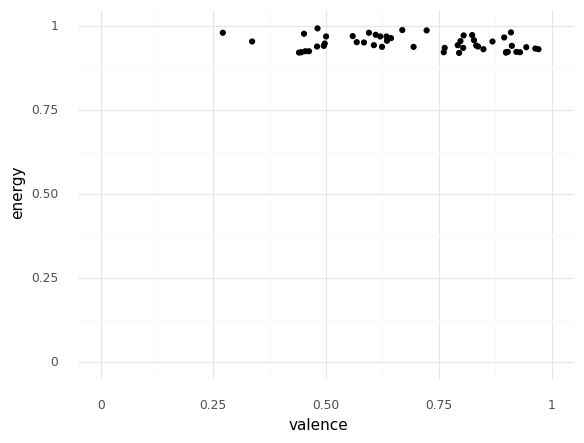

<ggplot: (8782611724737)>

In [123]:
(ggplot(large_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [135]:
small_valence_df = df_combo.nsmallest(50, "valence") #smallest valence in our entire dataset
# small_valence_df
small_valence_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Hello,246933,8,0.424,0.2220,9,-15.053,0,0.0391,0.6460,0.000000,0.1480,0.0606,61.648,audio_features,6HMvJcdw6qLsyV1b5x29sa,spotify:track:6HMvJcdw6qLsyV1b5x29sa,https://api.spotify.com/v1/tracks/6HMvJcdw6qLs...,https://api.spotify.com/v1/audio-analysis/6HMv...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.8330,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.7090,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
95,Still Loving You,403453,7,0.282,0.6050,6,-4.916,0,0.0294,0.0047,0.001440,0.1030,0.0783,103.929,audio_features,0RdUX4WE0fO30VnlUbDVL6,spotify:track:0RdUX4WE0fO30VnlUbDVL6,https://api.spotify.com/v1/tracks/0RdUX4WE0fO3...,https://api.spotify.com/v1/audio-analysis/0RdU...,4
0,Older,333107,3,0.572,0.4390,5,-10.377,1,0.0258,0.1470,0.000379,0.0612,0.0794,147.741,audio_features,1oMNeGkqwyEOLMUTrgdIr2,spotify:track:1oMNeGkqwyEOLMUTrgdIr2,https://api.spotify.com/v1/tracks/1oMNeGkqwyEO...,https://api.spotify.com/v1/audio-analysis/1oMN...,4


In [125]:
# only want valence and energy info
small_valence = small_valence_df[valence_energy]
small_valence

,name,valence,energy
0,Hello,0.0606,0.2220
24,Sometimes It Snows in April,0.0622,0.0644
71,Blue Spanish Sky,0.0780,0.1140
95,Still Loving You,0.0783,0.6050
0,Older,0.0794,0.4390
27,One More Try - Remastered,0.0823,0.2910
22,Babe,0.0903,0.2040
10,You Are So Beautiful,0.0920,0.1820
86,Going Home (Theme of the Local Hero),0.0979,0.4820
40,Silent Lucidity - Remastered 2003,0.0981,0.6280


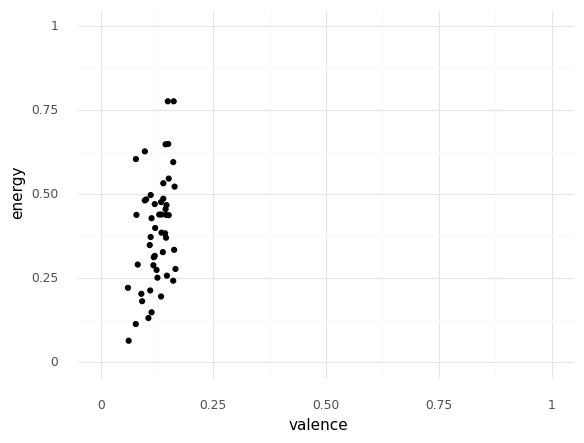

<ggplot: (8782611829185)>

In [126]:
(ggplot(small_valence_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))

In [136]:
small_energy_df = df_combo.nsmallest(50, "energy") #smallest energy in our entire dataset
# small_energy_df
small_energy_df.head()

,name,duration_ms,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
70,Longer,195067,8,0.308,0.0427,7,-24.709,1,0.0336,0.865,0.000000,0.1790,0.3830,158.399,audio_features,56ilrbKJF2bph5W6eZaM5E,spotify:track:56ilrbKJF2bph5W6eZaM5E,https://api.spotify.com/v1/tracks/56ilrbKJF2bp...,https://api.spotify.com/v1/audio-analysis/56il...,4
24,Sometimes It Snows in April,409000,12,0.494,0.0644,4,-23.939,1,0.0402,0.833,0.000000,0.0969,0.0622,103.757,audio_features,1Az0fhiWi0EVS4cZ3FF20X,spotify:track:1Az0fhiWi0EVS4cZ3FF20X,https://api.spotify.com/v1/tracks/1Az0fhiWi0EV...,https://api.spotify.com/v1/audio-analysis/1Az0...,4
1,This Woman's Work,214000,10,0.353,0.1130,8,-18.752,1,0.0399,0.888,0.000048,0.1210,0.1690,128.304,audio_features,6FN08oB3MT2BxYIJoR1CZ5,spotify:track:6FN08oB3MT2BxYIJoR1CZ5,https://api.spotify.com/v1/tracks/6FN08oB3MT2B...,https://api.spotify.com/v1/audio-analysis/6FN0...,4
71,Blue Spanish Sky,238400,6,0.399,0.1140,9,-24.116,0,0.0370,0.709,0.480000,0.1250,0.0780,113.769,audio_features,7ybeQwgAVDbKdfYvQnXHI4,spotify:track:7ybeQwgAVDbKdfYvQnXHI4,https://api.spotify.com/v1/tracks/7ybeQwgAVDbK...,https://api.spotify.com/v1/audio-analysis/7ybe...,3
26,Why Worry?,509067,5,0.591,0.1320,4,-21.243,1,0.0296,0.934,0.553000,0.2710,0.1060,93.714,audio_features,0NL5lqKSd0obXvKwfvyTKw,spotify:track:0NL5lqKSd0obXvKwfvyTKw,https://api.spotify.com/v1/tracks/0NL5lqKSd0ob...,https://api.spotify.com/v1/audio-analysis/0NL5...,4


In [128]:
# only want valence and energy info
small_energy = small_energy_df[valence_energy]
small_energy

,name,valence,energy
70,Longer,0.3830,0.0427
24,Sometimes It Snows in April,0.0622,0.0644
1,This Woman's Work,0.1690,0.1130
71,Blue Spanish Sky,0.0780,0.1140
26,Why Worry?,0.1060,0.1320
32,More Than Words,0.2390,0.1340
41,I Can't Make You Love Me,0.1130,0.1490
10,You Are So Beautiful,0.0920,0.1820
73,There's No Easy Way,0.1940,0.1840
33,Running To Stand Still - Remastered 2007,0.2240,0.1850


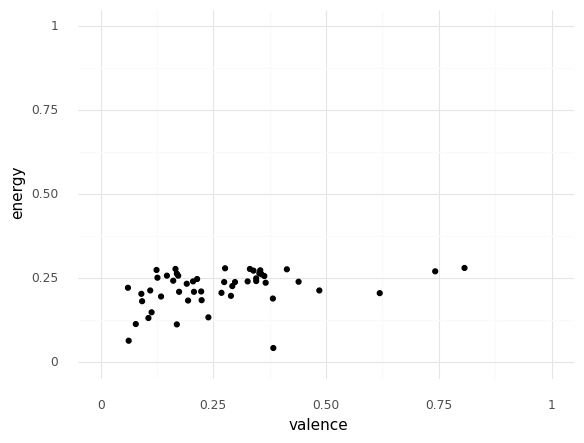

<ggplot: (8782611821949)>

In [129]:
(ggplot(small_energy_df, aes(x = "valence", y = "energy")) + 
geom_point() + 
theme_minimal() +
expand_limits(x = 0, y = 0) + 
xlim(0, 1)+ ylim(0, 1))